<a href="https://colab.research.google.com/github/kelvynlukito/Object_Detection_YOLOv5/blob/main/Object_Detection_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Object Detection [Truck] Using YOLOv5**

*   **Kelvyn Lukito 1301200104**



## **Install requirements packages**

In [ ]:
!pip install ultralytics
!git clone https://github.com/ultralytics/yolov5
!pip install -r '/content/yolov5/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 8.0 MB/s eta 0:00:00
Cloning into 'yolov5'...
remote: Enumerating objects: 16117, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 16117 (delta 9), reused 11 (delta 1), pack-reused 16089
Receiving objects: 100% (16117/16117), 14.86 MiB | 27.27 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imag

## **Prepare Training & Validation Dataset [Robofolow]**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Mc5lCCa6mRlMvDGLYdh8")
project = rf.workspace("yolov5-uietf").project("bus-and-truck")
dataset = project.version(4).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Bus-and-truck-4 in yolov5pytorch:: 100%|██████████| 179/179 [00:00<00:00, 7033.99it/s]


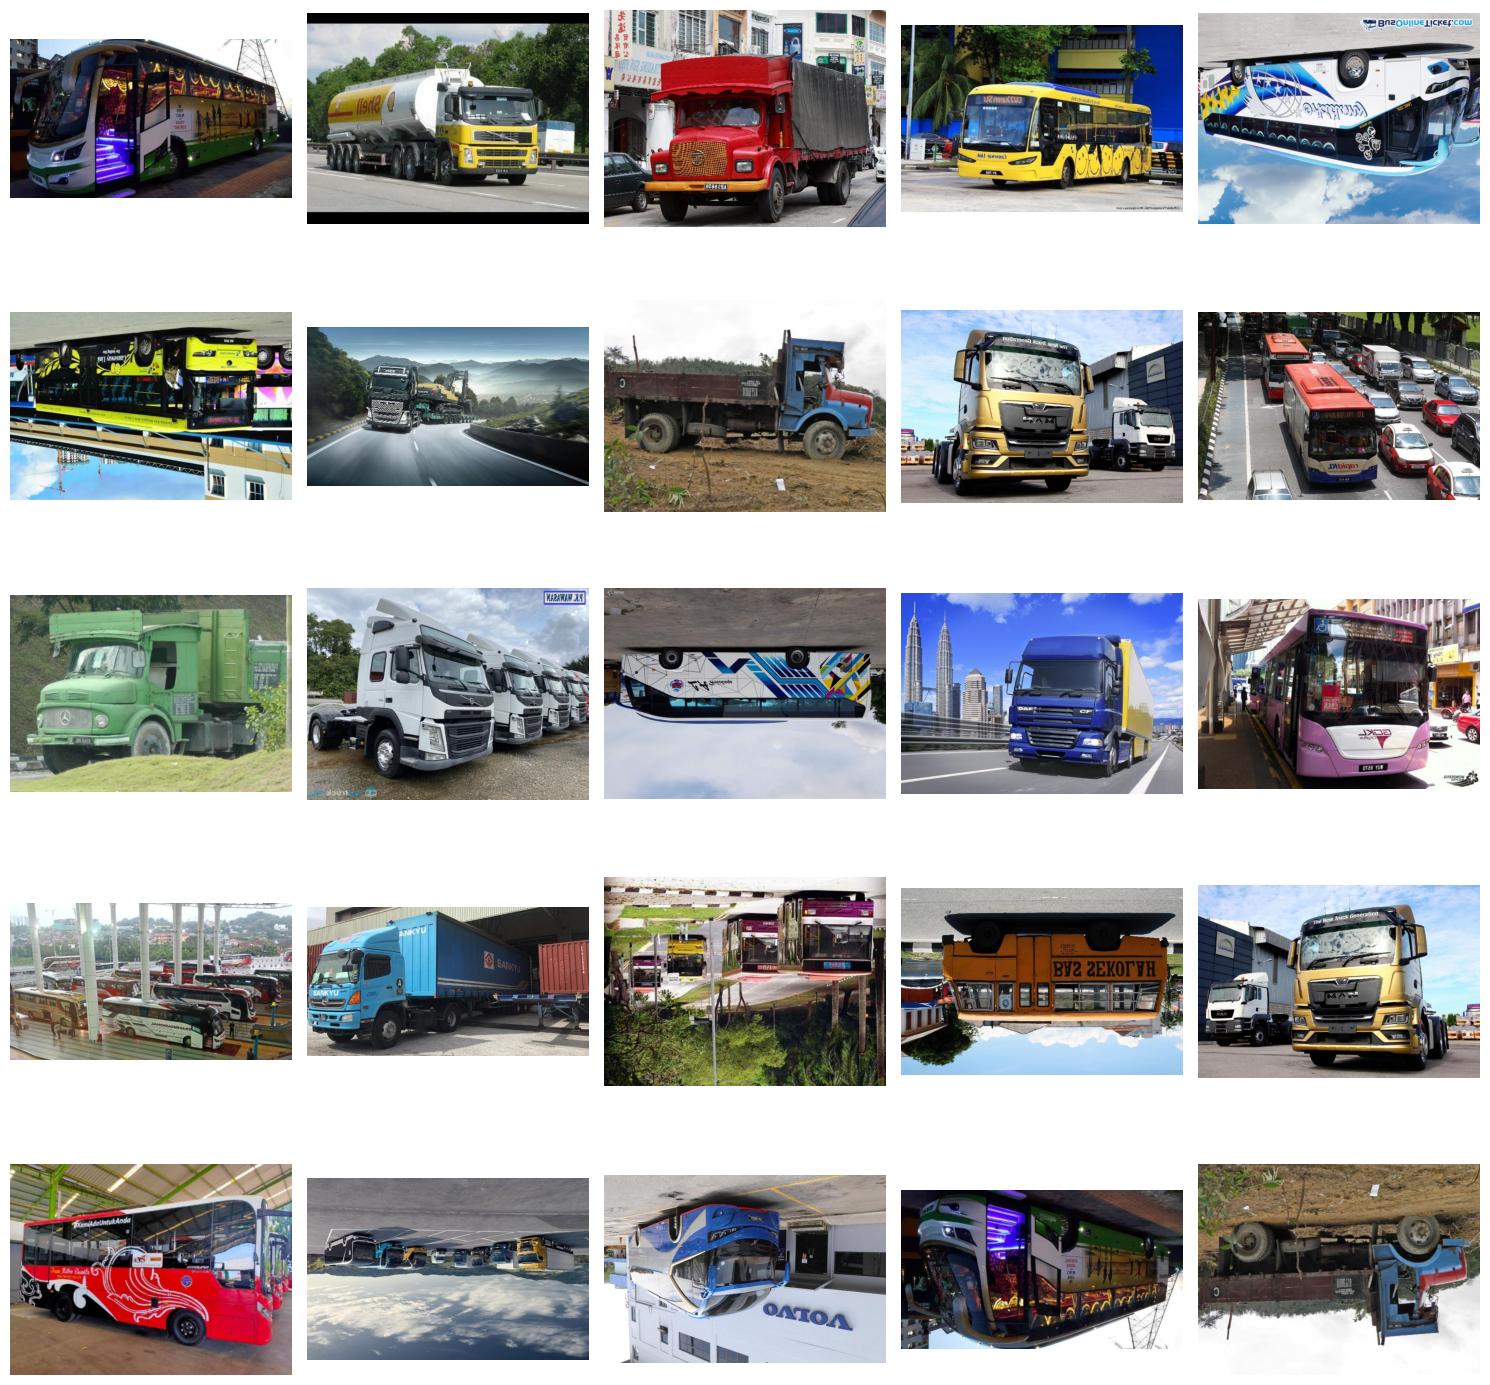

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Specify the directory path where your images are located
directory_path = "/content/Bus-and-truck-4/train/images"

# Get the list of image files in the directory
image_files = [f for f in os.listdir(directory_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Take only the first 25 images
image_files = image_files[:25]

# Set up the subplot grid
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# Iterate through the images and display them in the grid
for i, image_file in enumerate(image_files):
    image_path = os.path.join(directory_path, image_file)

    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image in the corresponding subplot
    axs[i // 5, i % 5].imshow(image)
    axs[i // 5, i % 5].axis("off")
    # axs[i // 5, i % 5].set_title(image_file)

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()

## **Testing Pretrained Model YOLOv5**

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Images
imgs = ['/content/dump truk.jpg']  # batch of images

# Inference
results = model(imgs)

# Results
results.print()
results.save()
results.show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

## **YoloV5 Tunning Process 1**

In [ ]:
import torch

# Train the model
!python '/content/yolov5/train.py' --img-size 650 --batch-size 10 --epochs 50 --data '/content/Bus-and-truck-4/data.yaml' --cfg '/content/yolov5/models/yolov5s.yaml' --weights yolov5s.pt

2023-12-30 11:13:22.392190: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:13:22.392249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:13:22.393684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/Bus-and-truck-4/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=650, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

## **YoloV5 Tunning Process 2**

In [ ]:
import torch

# Train the model
!python '/content/yolov5/train.py' --img-size 750 --batch-size 15 --epochs 50 --data '/content/Bus-and-truck-4/data.yaml' --cfg '/content/yolov5/models/yolov5s.yaml' --weights yolov5s.pt

2023-12-30 11:16:35.721015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:16:35.721066: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:16:35.722448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/Bus-and-truck-4/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=15, imgsz=750, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

## **YoloV5 Tunning Process 3**

In [ ]:
import torch

# Train the model
!python '/content/yolov5/train.py' --img-size 850 --batch-size 20 --epochs 50 --data '/content/Bus-and-truck-4/data.yaml' --cfg '/content/yolov5/models/yolov5s.yaml' --weights yolov5s.pt

2023-12-30 11:20:01.451071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:20:01.451116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:20:01.452536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/Bus-and-truck-4/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=20, imgsz=850, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

## **YoloV5 Tunning Process 4**

In [ ]:
import torch

# Train the model
!python '/content/yolov5/train.py' --img-size 950 --batch-size 25 --epochs 50 --data '/content/Bus-and-truck-4/data.yaml' --cfg '/content/yolov5/models/yolov5s.yaml' --weights yolov5s.pt

2023-12-30 11:23:54.955660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 11:23:54.955728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 11:23:54.957152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/Bus-and-truck-4/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=25, imgsz=950, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

## **Validation Process 1**

In [ ]:
# Evaluate the model
!python '/content/yolov5/val.py' --data '/content/Bus-and-truck-4/data.yaml' --img-size 650 --conf-thres 0.001 --iou-thres 0.6 --weights '/content/yolov5/runs/train/exp3/weights/best.pt'

val: data=/content/Bus-and-truck-4/data.yaml, weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=650, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 650 must be multiple of max stride 32, updating to 672
val: Scanning /content/Bus-and-truck-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.32s/it]
                   all         20         31      0.917      0.923      0.971      0.635
    

## **Validation Process 2**

In [ ]:
# Evaluate the model
!python '/content/yolov5/val.py' --data '/content/Bus-and-truck-4/data.yaml' --img-size 750 --conf-thres 0.001 --iou-thres 0.6 --weights '/content/yolov5/runs/train/exp4/weights/best.pt'

val: data=/content/Bus-and-truck-4/data.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=750, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 750 must be multiple of max stride 32, updating to 768
val: Scanning /content/Bus-and-truck-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.61s/it]
                   all         20         31      0.901      0.853      0.949      0.587
    

## **Validation Process 3**

In [ ]:
# Evaluate the model
!python '/content/yolov5/val.py' --data '/content/Bus-and-truck-4/data.yaml' --img-size 850 --conf-thres 0.001 --iou-thres 0.6 --weights '/content/yolov5/runs/train/exp5/weights/best.pt'

val: data=/content/Bus-and-truck-4/data.yaml, weights=['/content/yolov5/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=850, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 850 must be multiple of max stride 32, updating to 864
val: Scanning /content/Bus-and-truck-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.23s/it]
                   all         20         31      0.884      0.893      0.929      0.562
    

## **Validation Process 4**

In [ ]:
# Evaluate the model
!python '/content/yolov5/val.py' --data '/content/Bus-and-truck-4/data.yaml' --img-size 950 --conf-thres 0.001 --iou-thres 0.6 --weights '/content/yolov5/runs/train/exp6/weights/best.pt'

val: data=/content/Bus-and-truck-4/data.yaml, weights=['/content/yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=950, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-254-gba63208 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 950 must be multiple of max stride 32, updating to 960
val: Scanning /content/Bus-and-truck-4/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.06s/it]
                   all         20         31      0.833      0.804      0.842       0.44
    

## **Testing Process**

In [ ]:
# Inference on a single image (modify the path accordingly)
!python '/content/yolov5/detect.py' --weights '/content/yolov5/runs/train/exp4/weights/best.pt' --img-size 416 --source '/content/truck-image-1.jpg'

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/truck-image-1.jpg, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/truck-image-1.jpg: 320x416 1 Bus, 4 Cars, 7 Trucks, 48.8ms
Speed: 0.4ms pre-process, 48.8ms inference, 473.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to yolov5/runs/detect/exp


# **Access Webcam With Object Detection**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set detection threshold
conf_threshold = 0.6

# Set AutoShape options with the desired confidence threshold
model.conf = conf_threshold

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-30 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
from IPython.display import Image

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Images
  imgs = [filename]  # batch of images

  # Inference
  results = model(imgs)

  # Results
  results.print()
  results.save()  # or .show()

  results.xyxy[0]  # img1 predictions (tensor)
  results.pandas().xyxy[0]  # img1 predictions (pandas)
  results.show()

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg
cannot identify image file 'photo.jpg'
